Analyse the time evolution results

ValueError: x and y must have same first dimension, but have shapes (1,) and (301,)

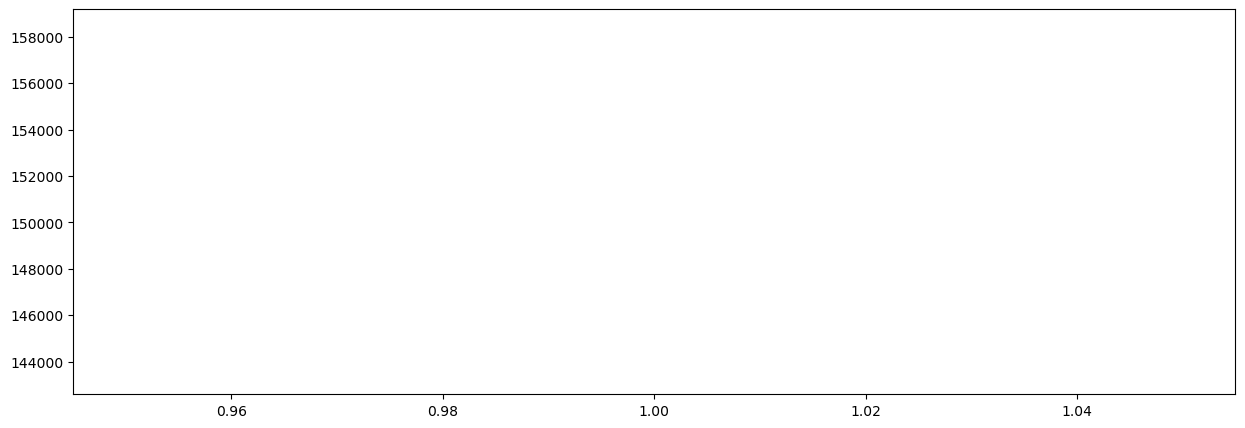

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

stem = 'Results/'
stem2 = 'ResultsGS/'

measure_tvec = np.load(stem+'measure_tvec.npy')
Fisher_mat = np.load(stem + 'Fisher_mat.npy')
Fisher_mat_GS = np.load(stem2 + 'Fisher_mat_N100.npy')
h0mat = np.load(stem + 'h0mat.npy')
density = np.load(stem + 'density.npy')
sub_system_range = np.load('Results/subsystem_range.npy')

sites = np.size(density[0],0)
phasepoints = np.size(h0mat)
color = plt.cm.viridis(np.linspace(0,1,sites))
color2 = plt.cm.viridis(np.linspace(0,1,phasepoints))

#initialize variables 
time_tot = np.size(measure_tvec)
Fisher_av = np.zeros([phasepoints,np.size(sub_system_range)])

#loop over h0 and subsystem size
for kk in range(0, phasepoints):

    for ss in range(0, np.size(sub_system_range)):
        #Extract steady state (or late time) Fisher information by averaging over final 10% of times
        Fisher_av[kk,ss] = Fisher_av[kk,ss] + np.mean(Fisher_mat[kk][ss,int(5*time_tot/10):int(time_tot)])
        

#plot h0 vs Fisher for a specific subsystem size (here smallest one)
sub_system_plot_index = 0
fig1, ax = plt.subplots(1,1,figsize = (15,5))
ax0 = ax
ax0.plot(h0mat,Fisher_av[:,sub_system_plot_index])
ax0.plot(h0mat,Fisher_mat_GS[:,0],'--')
ax0.set_title(r'Final Fisher information vs $h_0$ for L = ' + str(sub_system_range[sub_system_plot_index]) + ' N = ' + str(sites))
ax0.set_xlabel(r'$h_0$')
ax0.set_ylabel(r'$F_Q$')

# ax1 = ax[1]
# ax1.set_title(r'Final Fisher information vs L, with' ' N = ' + str(sites) + r'$,~h_0=$' + str(np.round(h0mat[int(phasepoints/2)-1],3)))
# ax1.plot(np.log10(sub_system_range),np.log10(Fisher_av[int(phasepoints/2)-1,:]))
# x = np.linspace(0.2,1.2,1000)
# ax1.plot(x,2*x,'r--',label = r'$F \sim L^{2}$')
# ax1.set_xlabel(r'$\log_{10} L$')
# ax1.set_ylabel(r'$\log_{10} F_Q$')
# ax1.legend()
plt.show()

# fig1, ax = plt.subplots(1,2,figsize = (15,5))
# ax0 = ax[0]
# ax1 = ax[1]
# ax0.set_title(r'Fisher information vs time, L = ' + str(sub_system_range[sub_system_plot_index]) + ' N = ' + str(sites))
# ax1.set_title(r'Fisher information vs time, L =  ' + str(sub_system_range[sub_system_plot_index])+ ' N = ' + str(sites))

# for kk in range(0,phasepoints):
#     #1.0/(h1_period)*
#     if kk%5 == 0:
#         ax0.plot(measure_tvec,Fisher_mat[kk][0,:],color = color2[kk],label = r'$h_0 = $' + str(np.round(h0mat[kk],4)) )
#         ax1.plot(measure_tvec,Fisher_mat[kk][0,:],color = color2[kk],label = r'$h_0 = $' + str(np.round(h0mat[kk],4)) )
#     elif kk == phasepoints-1:
#         ax0.plot(measure_tvec,Fisher_mat[kk][0,:],color = color2[kk],label = r'$h_0 = $' + str(np.round(h0mat[kk],4)) )
#         ax1.plot(measure_tvec,Fisher_mat[kk][0,:],color = color2[kk],label = r'$h_0 = $' + str(np.round(h0mat[kk],4)) )
#     else:
#         ax0.plot(measure_tvec,Fisher_mat[kk][0,:],color = color2[kk])
#         ax1.plot(measure_tvec,Fisher_mat[kk][0,:],color = color2[kk])

# ax0.set_ylabel(r'$F$')
# ax0.set_xlabel(r'$t$')
# ax1.set_ylabel(r'$F$')
# ax1.set_xlabel(r'$t$')
# ax0.legend(ncol = 2,fontsize = 8)
# ax1.legend(ncol = 2,fontsize = 8)
# ax0.set_ylim(0.1,10**6)
# ax0.set_yscale('log')
# plt.show()


# x = np.linspace(1,2,1000)
# #Plot Heisenberg scaling to guide the eye
# fig1, ax = plt.subplots(1,2,figsize = (15,5))
# ax0 = ax[0]
# ax1 = ax[1]
# ax0.set_title(r'Fisher information vs time, L = ' + str(sub_system_range[sub_system_plot_index]) + ' N = ' + str(sites))
# ax1.set_title(r'Fisher information vs time, L = ' + str(sub_system_range[-1]) + ' N = ' + str(sites))

# for kk in range(0,phasepoints):
        
#         ax0.plot(np.log10(measure_tvec),np.log10(np.cumsum(Fisher_mat[kk][sub_system_plot_index,:])/measure_tvec),color = color2[kk])
        
#         ax1.plot(measure_tvec,np.cumsum(Fisher_mat[kk][-1,:])/measure_tvec,color = color2[kk],)

# ax0.plot(x,2*x-1,'--r',label = r'$F \sim t^{2}$')
# ax0.set_ylabel(r'$\log_{10} F (time av)$')
# ax0.set_xlabel(r'$\log_{10} t$')
# ax1.set_ylabel(r'$F (time av)$')
# ax1.set_xlabel(r'$t$')
# ax1.set_ylim(0,100)
# plt.show()


# if phasepoints > 1:
#     fig1, ax = plt.subplots(1,2,figsize = (15,5))
#     ax0 = ax[0]
#     ax1 = ax[1]

#     for kk in range(0,phasepoints):
        
#         numberL = density[kk]

#         ax0.plot(measure_tvec,np.real(numberL[0,:]),color = color2[kk],label = r'$h_0 = $' + str(np.round(h0mat[kk],3)))
#         ax0.set_ylabel(r'$n_0(t)$')
#         ax0.set_xlabel(r'$t$')

#         hchoice = 0 #int(phasepoints/2)+4
#         # plot a single realization
#         if kk == hchoice:
#             for mm in range(0,sites):

#                 ax1.plot(measure_tvec,np.real(numberL[mm,:]),'--',label = str(mm),color = color[mm])
#                 ax1.set_ylabel(r'$n_j$')
#                 ax1.set_xlabel(r'$t$')
#                 #plt.legend()

#     ax0.set_title(r'Density vs time for site j = 0, for all $h_0$ values')      
#     ax1.set_title(r'Density vs time for all sites with  $h_0=$' + str(h0mat[hchoice]))  
#     #ax0.legend()
#     plt.show()





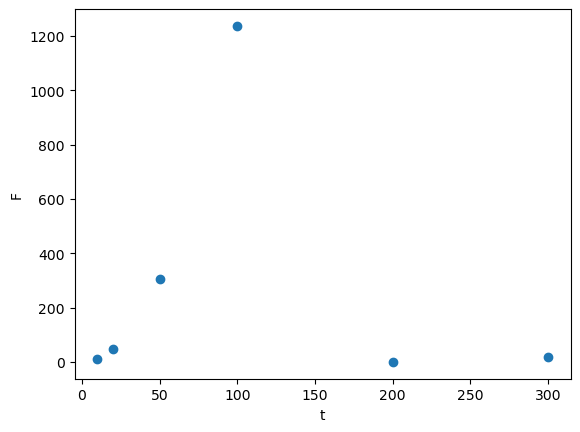

(-0.2955575926089484+5.176842650924876e-18j)


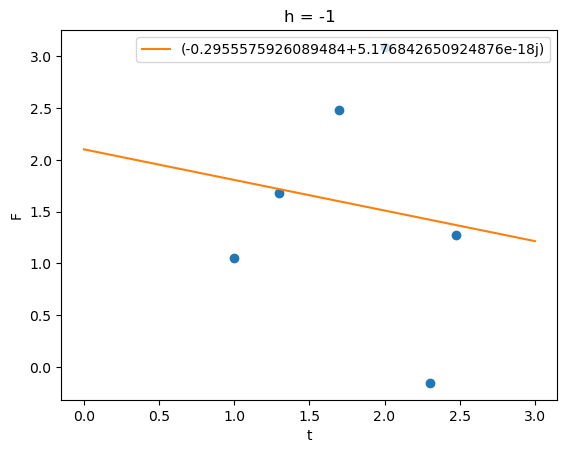

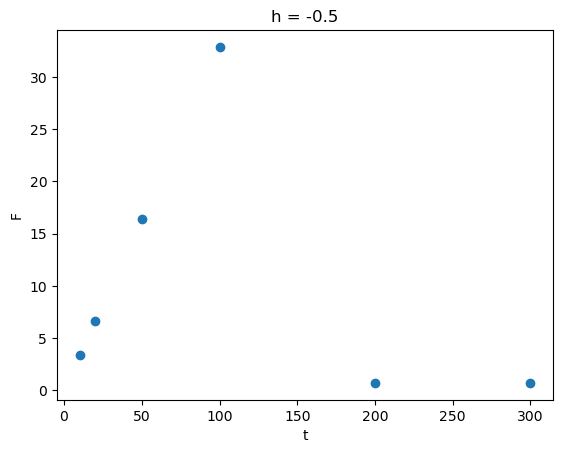

NameError: name 's' is not defined

In [ ]:
Fisher = []
sizes = [10,20,50,100,200,300]

for kk in range(0,len(sizes)):

    Fisher_mat_GS = np.load(stem2 + 'Fisher_mat_N' + str(sizes[kk]) + '.npy')

    Fisher = Fisher + [Fisher_mat_GS[50,0]]

plt.plot(sizes, Fisher, 'o')
plt.ylabel("F")
plt.xlabel("t")
plt.show()

plt.plot(np.log10(sizes), np.log10(Fisher), 'o')

a0,a1 = np.polyfit(np.log10(sizes), np.log10(Fisher) , 1)
x = np.linspace(0,3,100)
plt.plot(x,a0*x+a1,label = str(a0))
print(a0)
plt.title('h = -1')
plt.ylabel("F")
plt.xlabel("t")
plt.legend()
plt.show()

Fisher = []


for kk in range(0,len(sizes)):

    Fisher_mat_GS = np.load(stem2 + 'Fisher_mat_N' + str(sizes[kk]) + '.npy')

    Fisher = Fisher + [Fisher_mat_GS[101,0]]

plt.plot(sizes, Fisher, 'o')
plt.title('h = -0.5')
plt.ylabel("F")
plt.xlabel("t")
plt.show()
s
plt.plot(np.log10(sizes), np.log10(Fisher), 'o')

a0,a1 = np.polyfit(np.log10(sizes), np.log10(Fisher) , 1)
x = np.linspace(0,3,100)
plt.plot(x,a0*x+a1,label = str(a0))
plt.legend()
print(a0)
plt.ylabel("F")
plt.xlabel("t")
plt.show()

(1, 501, 100, 100)
Analytic [[ 0.818+0.j  0.106+0.j -0.021+0.j  0.009+0.j -0.005-0.j  0.003-0.j
  -0.002+0.j  0.002-0.j -0.001+0.j  0.001+0.j -0.001+0.j  0.001-0.j
  -0.001-0.j  0.   -0.j -0.   -0.j  0.   -0.j -0.   +0.j  0.   +0.j
  -0.   -0.j  0.   +0.j -0.   -0.j  0.   -0.j -0.   +0.j  0.   -0.j
  -0.   +0.j  0.   +0.j -0.   -0.j  0.   -0.j -0.   +0.j  0.   +0.j
  -0.   -0.j  0.   +0.j -0.   +0.j  0.   -0.j -0.   -0.j  0.   +0.j
  -0.   -0.j  0.   -0.j -0.   -0.j  0.   -0.j -0.   +0.j  0.   +0.j
  -0.   -0.j  0.   +0.j -0.   +0.j  0.   +0.j -0.   +0.j  0.   -0.j
  -0.   -0.j  0.   +0.j  0.   +0.j -0.   -0.j  0.   +0.j -0.   +0.j
   0.   -0.j -0.   -0.j  0.   -0.j -0.   -0.j  0.   +0.j -0.   -0.j
   0.   -0.j -0.   +0.j  0.   +0.j -0.   +0.j  0.   +0.j -0.   -0.j
   0.   +0.j -0.   +0.j  0.   -0.j -0.   -0.j  0.   +0.j -0.   -0.j
   0.   -0.j -0.   +0.j  0.   +0.j -0.   -0.j  0.   -0.j -0.   +0.j
   0.   -0.j -0.   +0.j  0.   +0.j -0.   -0.j  0.   +0.j -0.   -0.j
   0.   -0.j -0.   -

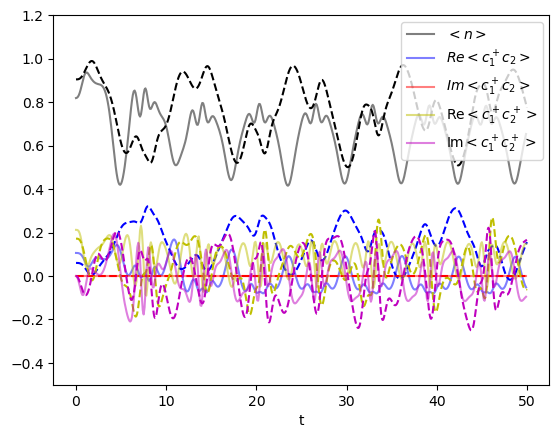

In [ ]:
time = np.load(stem+'measure_tvec.npy')
density = np.load(stem+'density.npy')
corrmat = np.load(stem+'corrmat.npy')
pairing = np.load(stem+'pair_creation.npy')
Fisher_mat = np.load(stem + 'Fisher_mat.npy')

stemED = '/Users/samuelbegg/Documents/Sensing/matrix_results/'
ED_SpSp = np.load(stemED + 'sigma+sigma+.npy')
ED_SpSm = np.load(stemED + 'sigma+sigma-.npy')
ED_density = np.load(stemED + 'sigmaZ.npy')
ED_magsites = np.load(stemED + 'magsites.npy')
ED_time = np.load(stemED + 'time.npy')

print(np.shape(pairing))
plt.plot(time, density[0,1,:] , "k",label = r"$<n>$",alpha = 0.5)
plt.plot(ED_time, 0.5 * ED_magsites[0,:]  + 0.5, "--k")

plt.plot(time,np.real(corrmat[0,0:-1,0,1]), "b",label= r"$Re<c^+_1 c_2>$",alpha = 0.5)
plt.plot(ED_time, np.real(ED_SpSm),"--b")

plt.plot(time,np.imag(corrmat[0,0:-1,0,1]), "r",label= r"$Im<c^+_1 c_2>$",alpha = 0.5)
plt.plot(ED_time, np.imag(ED_SpSm),"--r")

plt.plot(time,np.real(pairing[0,0:-1,0,1]), "y",label= r"Re$<c^+_1 c^+_2>$",alpha = 0.5)
plt.plot(ED_time,  np.real(ED_SpSp),"--y")

plt.plot(time,np.imag(pairing[0,0:-1,0,1]),"m", label= r"Im$<c^+_1 c^+_2>$",alpha = 0.5)
plt.plot(ED_time,  np.imag(ED_SpSp),"--m")

print("Analytic",np.round(corrmat[0,0:1,0,:],3))
print("ED", 4 * ED_SpSm[0])

# Formulas give correct answer if ED x 4. 


plt.legend()
plt.xlabel('t')
#plt.xlim(0,10)
plt.ylim(-0.5,1.2)
plt.show()



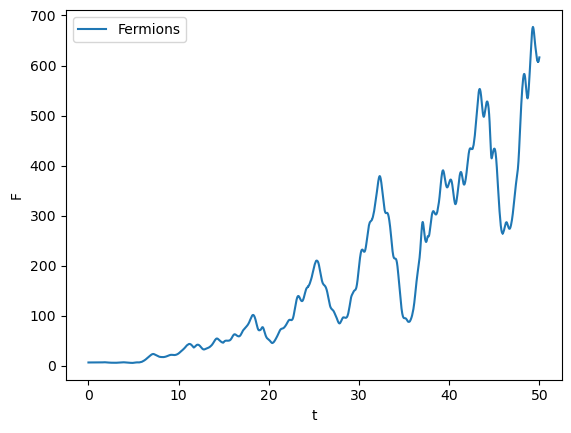

In [ ]:
time = np.load(stem+'measure_tvec.npy')
density = np.load(stem+'density.npy')
corrmat = np.load(stem+'corrmat.npy')
pairing = np.load(stem+'pair_creation.npy')
Fisher_mat = np.load(stem + 'Fisher_mat.npy')

#plt.plot(ED_time[::100], ED_Fisher[0:-1],label = "ED")
plt.plot(time, Fisher_mat[0,0,:],label = "Fermions")
plt.legend()
plt.ylabel("F")
plt.xlabel("t")
plt.show()



# Check integration tolerance effect and also changing delta h


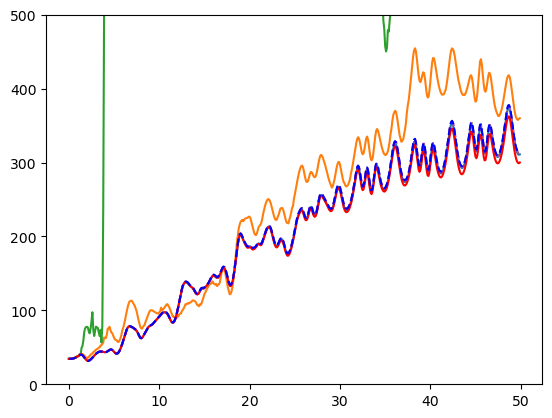

In [ ]:
# results here are 10^{-4} shifted from critical point with shift 10^{-6}

tvec = np.load('Results/measure_tvec_M10.npy')
Fisher = np.load('Results/Fisher_mat_M10.npy')
plt.plot(tvec,Fisher[0,0,:])

#M10 taking 1 min 20 (half the time of DOP algorithm)

tvec = np.load('Results/measure_tvec_M8.npy')
Fisher = np.load('Results/Fisher_mat_M8.npy')
plt.plot(tvec,Fisher[0,0,:])

tvec = np.load('Results/measure_tvec_M7.npy')
Fisher = np.load('Results/Fisher_mat_M7.npy')
plt.plot(tvec,Fisher[0,0,:])

tvec = np.load('Results/measure_tvec_M11.npy')
Fisher = np.load('Results/Fisher_mat_M11.npy')
plt.plot(tvec,Fisher[0,0,:],"--")

# M11 here took 2 minutes for each F sweep (x 4 for 4th order derivative)



# M10 here took 2 minutes 40 seconds for each F sweep (x 4 for 4th order derivative)

# check result is the same as further to critical point if use |delta h| = 10^{-3] from h_c and shift 10^{-5} for derivative
tvec = np.load('Results/measure_tvec_M10DOP.npy')
Fisher = np.load('Results/Fisher_mat_M10DOP.npy')
plt.plot(tvec,Fisher[0,0,:],"--")

# keep atol = 10^{-10} but consider shift from critical point to be smaller.
tvec = np.load('Results/measure_tvec_M10_v2.npy')
Fisher = np.load('Results/Fisher_mat_M10_v2.npy')
plt.plot(tvec,Fisher[0,0,:],"-r")
# this gives a small deviation, clearly it is not close enough to critical point.

# how about the same again but actually starting at the critical point itself? i.e. was the issue with shift or with not simulating the critical point itself.
tvec = np.load('Results/measure_tvec_M10_v3.npy')
Fisher = np.load('Results/Fisher_mat_M10_v3.npy')
plt.plot(tvec,Fisher[0,0,:],"--b")

# This works well. 
plt.ylim(0,500)
plt.show()

compare Floquet code vs full time code

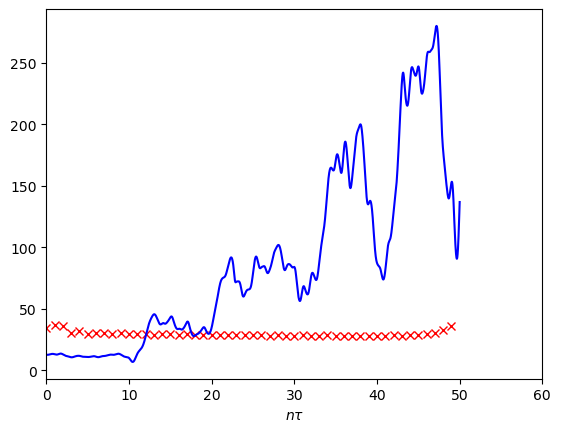

/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_47795/3577529454.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  diff[tt] = floq_fisher[tt] - Fisher[0,0,ttt]


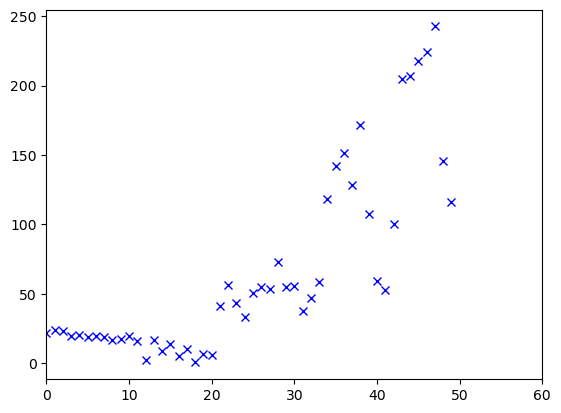

In [ ]:
floq_fisher = np.load('Results_Floquet/Fisher_mat_t1.npy')
floq_ftime  = np.load('Results_Floquet/final_time_t1.npy')
floq_time = np.arange(0,floq_ftime)

plt.plot(floq_time , floq_fisher[:], "rx")

tvec = np.load('Results/measure_tvec_M10_floqcomp.npy')
Fisher = np.load('Results/Fisher_mat_M10_floqcomp.npy')

plt.plot(tvec ,Fisher[0,0,:] ,"-b")

plt.xlabel(r"$n\tau$")
#plt.ylim(0,700)
plt.xlim(0,60)
plt.show()


diff = np.zeros(np.size(floq_fisher))
for tt in range(0,np.size(floq_fisher)):
    for ttt in range(0,np.size(Fisher[0,0,:])):
        if float(floq_time[tt]) - tvec[ttt] == 0:
            diff[tt] = floq_fisher[tt] - Fisher[0,0,ttt]

plt.plot(floq_time,np.abs(diff),"xb")
plt.xlim(0,60)
plt.show()



compare Floquet code with itselt, looking at eigenvalue tolerances

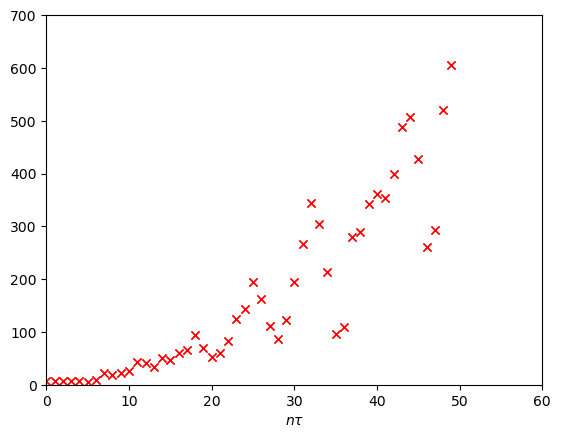

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


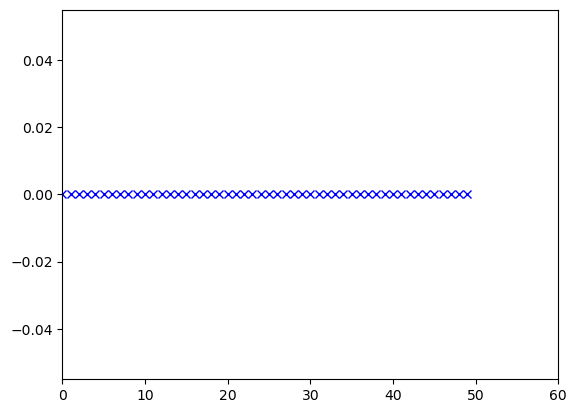

In [ ]:
# floq_fisher_tol12 = np.load('Results_Floquet/Fisher_mat_tol12.npy')
# floq_ftime_tol12  = np.load('Results_Floquet/final_time_tol12.npy')

# floq_fisher_tol9 = np.load('Results_Floquet/Fisher_mat_tol9.npy')
# floq_ftime_tol9  = np.load('Results_Floquet/final_time_tol9.npy')

floq_fisher_tol12 = np.load('Results_Floquet/Fisher_mat_tol12.npy')
floq_ftime_tol12  = np.load('Results_Floquet/final_time_tol12.npy')
floq_time = np.arange(0,floq_ftime_tol12)


floq_fisher_tol7 = np.load('Results_Floquet/Fisher_mat_tol7.npy')
floq_ftime_tol7  = np.load('Results_Floquet/final_time_tol7.npy')

plt.plot(floq_time , floq_fisher_tol12, "rx")
plt.plot(floq_time , floq_fisher_tol7, "rx")

plt.xlabel(r"$n\tau$")
plt.ylim(0,700)
plt.xlim(0,60)
plt.show()



diff = floq_fisher_tol7 - floq_fisher_tol12
print(diff)
plt.plot(floq_time,np.abs(diff),"xb")
plt.xlim(0,60)
plt.show()

now do similar but for shift

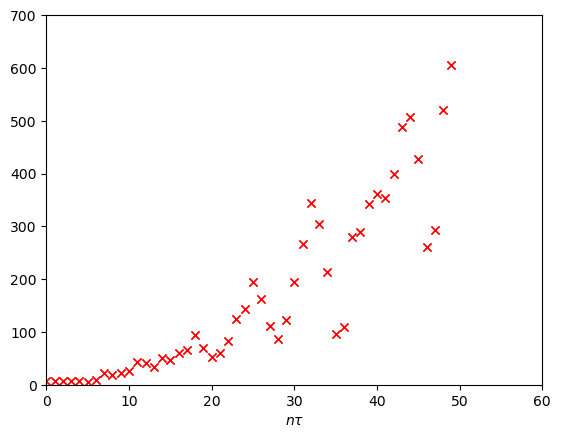

[-1.64108727e-11-7.35780967e-23j -8.68046346e-09+3.48859104e-17j
  1.14519780e-07+2.01161597e-16j  8.49641495e-08+3.63053582e-16j
 -1.51382933e-08+5.49171241e-16j  4.80961858e-07+2.11541123e-16j
 -9.23292909e-09-5.74334847e-16j  1.13031839e-06-1.25396390e-15j
 -9.11312284e-07-4.42887486e-16j  1.42965308e-06-7.69804494e-16j
 -2.63491920e-07+2.46807754e-15j -5.51483318e-07+1.48152248e-15j
  2.82447476e-06+4.57498943e-15j -3.10725028e-08+4.22477205e-16j
  3.09492834e-06+1.65377299e-15j -3.28684317e-06+1.96083416e-15j
  5.04853323e-06+1.35303966e-15j -2.50969403e-06-7.02933577e-16j
  4.08529203e-07-3.39568195e-15j -4.73918718e-06-1.78197782e-15j
  1.96839798e-06-1.38679323e-16j  3.84689293e-06-2.36497507e-15j
 -5.23432081e-06-1.95128610e-15j  1.26749480e-05+5.41845901e-15j
 -1.56176418e-06-1.59010455e-14j  1.02205757e-05-5.67875722e-15j
 -8.20500452e-06+7.46522750e-15j  1.86022848e-06-2.39018570e-15j
  2.94855421e-06-1.12470141e-15j -8.23286049e-06+1.25836245e-14j
  1.21657456e-05-1.545991

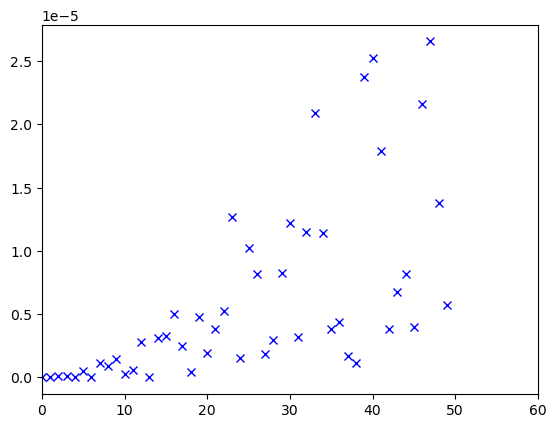

In [ ]:

floq_fisher_high = np.load('Results_Floquet/Fisher_mat_shift7.npy')
floq_ftime_high  = np.load('Results_Floquet/final_time_shift7.npy')
floq_time = np.arange(0,floq_ftime_high)


floq_fisher_low = np.load('Results_Floquet/Fisher_mat_shift5.npy')
floq_ftime_low  = np.load('Results_Floquet/final_time_shift5.npy')

plt.plot(floq_time , floq_fisher_high, "rx")
plt.plot(floq_time , floq_fisher_low, "rx")

plt.xlabel(r"$n\tau$")
plt.ylim(0,700)
plt.xlim(0,60)
plt.show()



diff = floq_fisher_low - floq_fisher_high
print(diff)
plt.plot(floq_time,np.abs(diff),"xb")
plt.xlim(0,60)
plt.show()

checks for N = 100 and N = 50

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


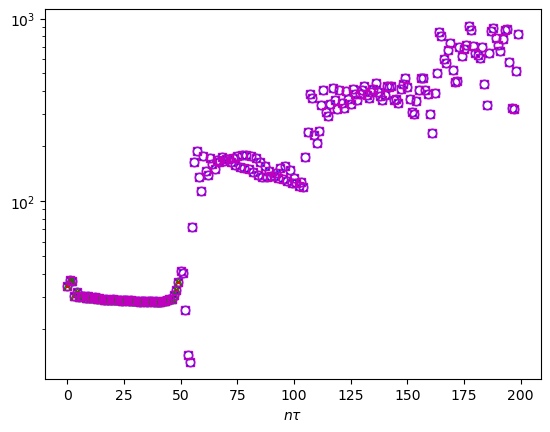

In [ ]:

floq_fisher_high = np.load('Results_Floquet/Fisher_mat_100_dtM4.npy')
floq_ftime_high  = np.load('Results_Floquet/final_time_100_dtM4.npy')
floq_time = np.arange(0,floq_ftime_high)


floq_fisher_low = np.load('Results_Floquet/Fisher_mat_100_dtM3.npy')
floq_ftime_low  = np.load('Results_Floquet/final_time_100_dtM3.npy')
floq_time3 = np.arange(0,floq_ftime_low)

floq_fisher_tol = np.load('Results_Floquet/Fisher_mat_100_dtM3_tolM12.npy')
floq_ftime_tol  = np.load('Results_Floquet/final_time_100_dtM3_tolM12.npy')

floq_fisher_tol_shift = np.load('Results_Floquet/Fisher_mat_100_dtM3_tolM12_shiftM8.npy')
floq_ftime_tol_shift  = np.load('Results_Floquet/final_time_100_dtM3_tolM12_shiftM8.npy')
floq_time2 = np.arange(0,floq_ftime_tol_shift)

plt.plot(floq_time , floq_fisher_high, "rx")
plt.plot(floq_time3 , floq_fisher_low, "bo",fillstyle = "none")
plt.plot(floq_time , floq_fisher_tol, "g^",fillstyle = "none")
plt.plot(floq_time2 , floq_fisher_tol_shift, "ms",fillstyle = "none")

plt.xlabel(r"$n\tau$")
ax = plt.gca()
ax.set_yscale('log')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_47795/1851080092.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,200)


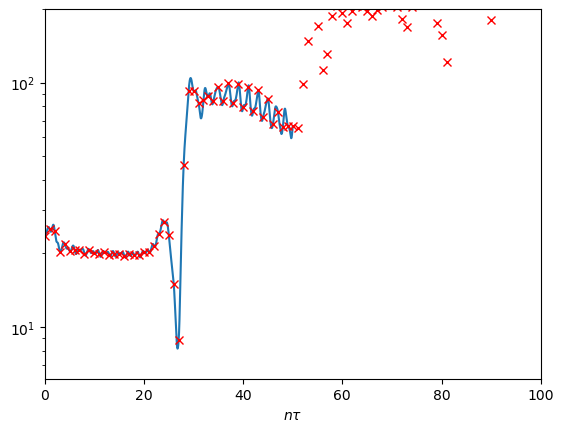

/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_47795/1851080092.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  diff[tt] = floq_fisher[tt] - Fisher[0,0,ttt]


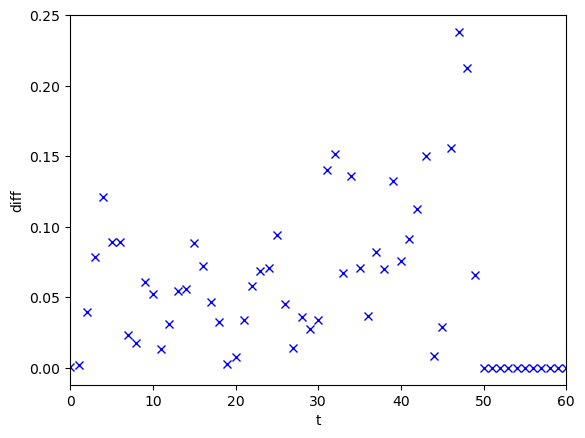

In [ ]:
floq_fisher= np.load('Results_Floquet/Fisher_mat_50_dtM3.npy')
floq_ftime = np.load('Results_Floquet/final_time_50_dtM3.npy')
floq_time = np.arange(0,floq_ftime)

tvec = np.load('Results/measure_tvec_M10_floqcomp.npy')
Fisher = np.load('Results/Fisher_mat_M10_floqcomp.npy')

plt.plot(tvec, Fisher[0,0,:])
plt.plot(floq_time , floq_fisher, "rx")
plt.xlabel(r"$n\tau$")
ax = plt.gca()
ax.set_yscale('log')
plt.xlim(0,100)
plt.ylim(0,200)
plt.show()

diff = np.zeros(np.size(floq_fisher))
for tt in range(0,np.size(floq_fisher)):
    for ttt in range(0,np.size(Fisher[0,0,:])):
        if float(floq_time[tt]) - tvec[ttt] == 0:
            diff[tt] = floq_fisher[tt] - Fisher[0,0,ttt]

plt.plot(floq_time,np.abs(diff),"xb")
plt.ylabel("diff")
plt.xlabel("t")
plt.xlim(0,60)
plt.show()



/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_47795/597793640.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,200)


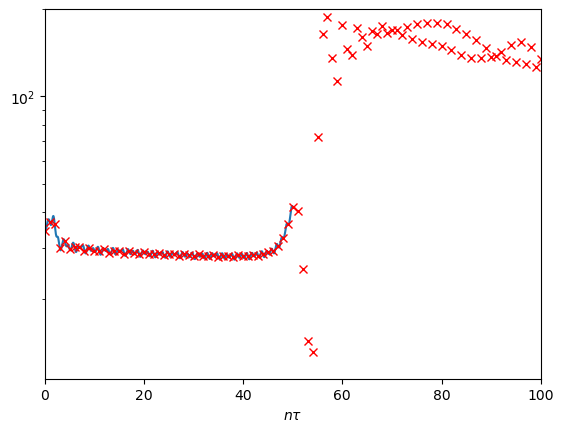

/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_47795/597793640.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  diff[tt] = floq_fisher[tt] - Fisher[0,0,ttt]


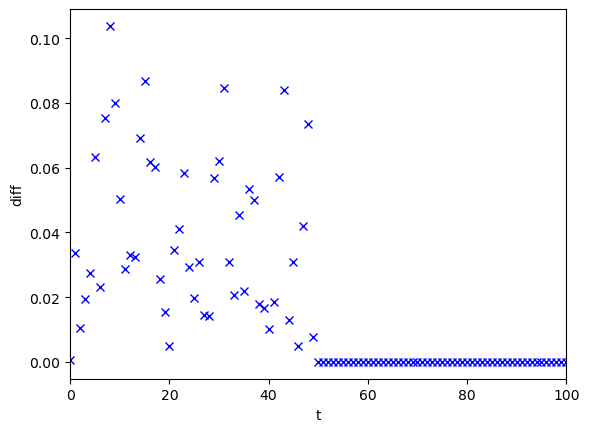

In [ ]:
floq_fisher= np.load('Results_Floquet/Fisher_mat_100_dtM3.npy')
floq_ftime = np.load('Results_Floquet/final_time_100_dtM3.npy')
floq_time = np.arange(0,floq_ftime)

tvec = np.load('Results/measure_tvec_100_M10_floqcomp.npy')
Fisher = np.load('Results/Fisher_mat_100_M10_floqcomp.npy')

plt.plot(tvec, Fisher[0,0,:])
plt.plot(floq_time , floq_fisher, "rx")
plt.xlabel(r"$n\tau$")
ax = plt.gca()
ax.set_yscale('log')
plt.xlim(0,100)
plt.ylim(0,200)
plt.show()

diff = np.zeros(np.size(floq_fisher))
for tt in range(0,np.size(floq_fisher)):
    for ttt in range(0,np.size(Fisher[0,0,:])):
        if float(floq_time[tt]) - tvec[ttt] == 0:
            diff[tt] = floq_fisher[tt] - Fisher[0,0,ttt]

plt.plot(floq_time,np.abs(diff),"xb")
plt.ylabel("diff")
plt.xlabel("t")
plt.xlim(0,100)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


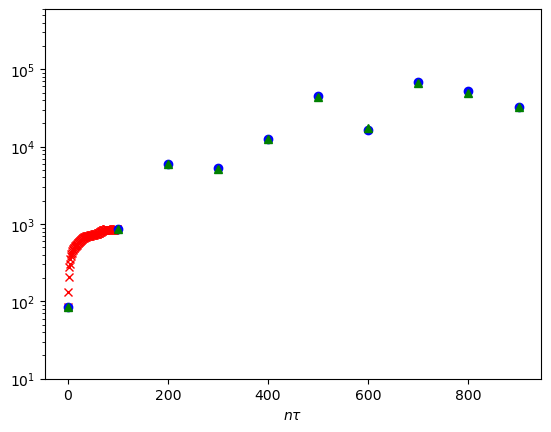

In [ ]:
floq_fisher= np.load('Results_Floquet/Fisher_mat_1000_dtM3.npy')
floq_ftime = np.load('Results_Floquet/final_time_1000_dtM3.npy')
floq_time = np.arange(0,floq_ftime)
plt.plot(floq_time , floq_fisher, "rx")

floq_fisher= np.load('Results_Floquet/Fisher_mat_1000_dtM3_long.npy')
floq_ftime = np.load('Results_Floquet/final_time_1000_dtM3_long.npy')
floq_time = np.arange(0,floq_ftime,100)
plt.plot(floq_time , floq_fisher, "bo")


floq_fisher= np.load('Results_Floquet/Fisher_mat_1000_dtM4_long.npy')
floq_ftime = np.load('Results_Floquet/final_time_1000_dtM4_long.npy')
floq_time = np.arange(0,floq_ftime,100)
plt.plot(floq_time , floq_fisher, "g^")



plt.xlabel(r"$n\tau$")
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylim(10,6*10**5)
plt.show()



# test the fermion PBC result

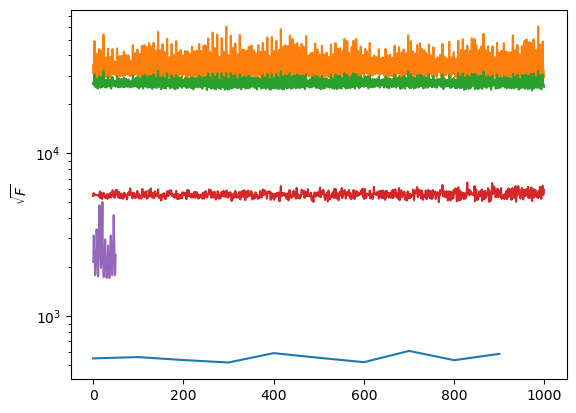

In [ ]:
floq_fisher= np.load('Results_Floquet/Fisher_mat_1000_M3_pbc.npy')
floq_ftime = np.load('Results_Floquet/final_time_1000_M3_pbc.npy')
floq_time = np.arange(0,floq_ftime,100)
plt.plot(floq_time , np.sqrt(floq_fisher), "-")

# floq_fisher= np.load('Results_Floquet/Fisher_mat_1000_M3_pbc_short.npy')
# floq_ftime = np.load('Results_Floquet/final_time_1000_M3_pbc_short.npy')
# floq_time = np.arange(0,floq_ftime)
# plt.plot(floq_time , np.sqrt(floq_fisher), "g^")


floq_fisher= np.load('Results_Floquet/Fisher_mat_20_M3_pbc.npy')
floq_ftime = np.load('Results_Floquet/final_time_20_M3_pbc.npy')
floq_time = np.arange(0,floq_ftime)
plt.plot(floq_time , np.sqrt(floq_fisher), "-")

floq_fisher= np.load('Results_Floquet/Fisher_mat_20_M4_pbc.npy')
floq_ftime = np.load('Results_Floquet/final_time_20_M4_pbc.npy')
floq_time = np.arange(0,floq_ftime)
plt.plot(floq_time , np.sqrt(floq_fisher), "-")

floq_fisher= np.load('Results_Floquet/Fisher_mat_100_M3_pbc.npy')
floq_ftime = np.load('Results_Floquet/final_time_100_M3_pbc.npy')
floq_time = np.arange(0,floq_ftime)
plt.plot(floq_time , np.sqrt(floq_fisher), "-")


tvec = np.load('Results/measure_tvec_20_M10_floqcomp_pbc.npy')
Fisher = np.load('Results/Fisher_mat_20_M10_floqcomp_pbc.npy')
plt.plot(tvec, np.sqrt(Fisher[0,0,:]))

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$\sqrt{F}$")
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


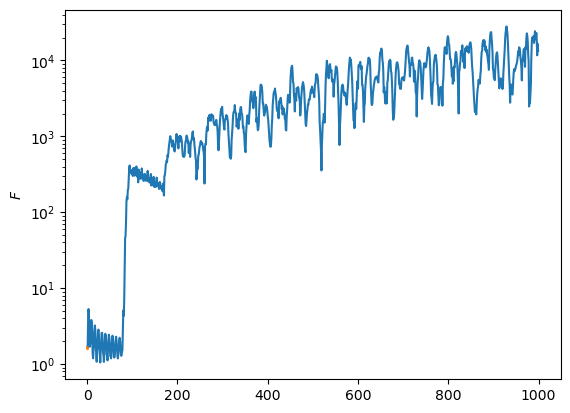

/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_68163/385683778.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10)


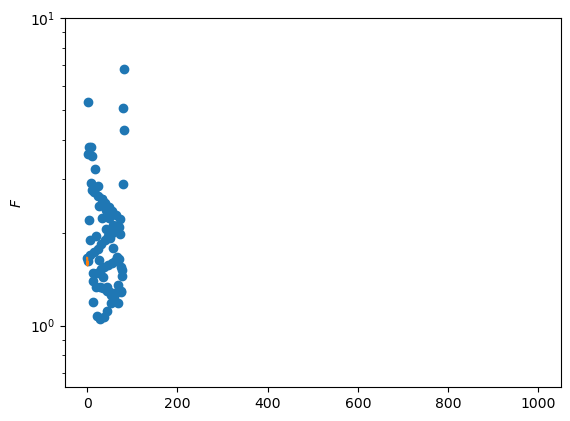

/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_68163/385683778.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10)


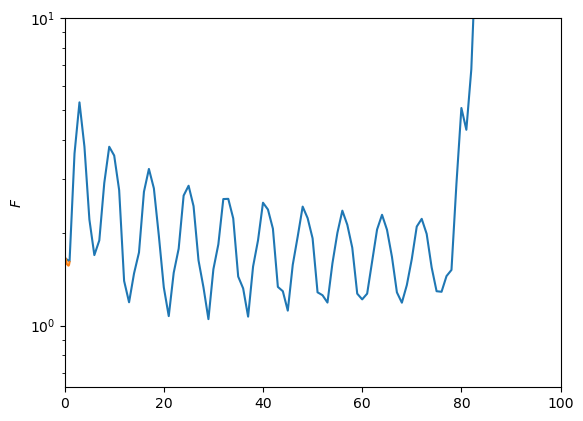

In [35]:
floq_ftime = np.load('Results_Floquet/final_time_100_test.npy')
floq_fisher = np.load('Results_Floquet/Fisher_mat_100_test.npy')
floq_time = np.arange(0,floq_ftime)
plt.plot(floq_time , floq_fisher, "-")
tvec = np.load('Results/measure_tvec_100_test.npy')
Fisher = np.load('Results/Fisher_mat_100_test.npy')
plt.plot(tvec, Fisher[0,0,:])
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.show()

floq_ftime = np.load('Results_Floquet/final_time_100_test.npy')
floq_fisher = np.load('Results_Floquet/Fisher_mat_100_test.npy')
floq_time = np.arange(0,floq_ftime)
plt.plot(floq_time , floq_fisher,"o")
tvec = np.load('Results/measure_tvec_100_test.npy')
Fisher = np.load('Results/Fisher_mat_100_test.npy')
plt.plot(tvec, Fisher[0,0,:])
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.ylim(0,10)
plt.show()

floq_ftime_100 = np.load('Results_Floquet/final_time_100_test.npy')
floq_fisher_100 = np.load('Results_Floquet/Fisher_mat_100_test.npy')
floq_time_100 = np.arange(0,floq_ftime_100)
plt.plot(floq_time_100 , floq_fisher_100,"-")
tvec = np.load('Results/measure_tvec_100_test.npy')
Fisher = np.load('Results/Fisher_mat_100_test.npy')
plt.plot(tvec, Fisher[0,0,:])
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.ylim(0,10)
plt.xlim(0,100)
plt.show()



# proof that dynamics thermalize up to finite size effects

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_68163/4208694313.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10)


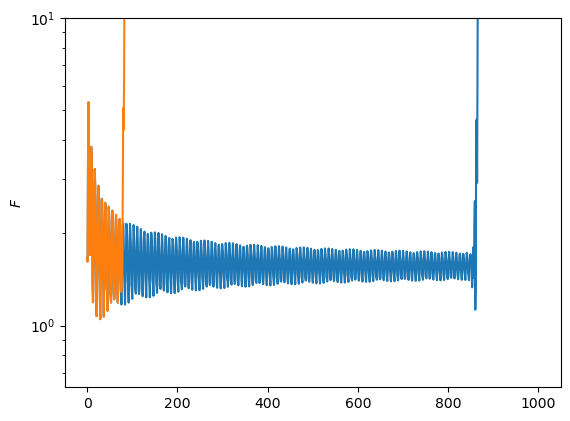

/var/folders/pb/7d4xww6j3131d4cdp0p3n2t40000gn/T/ipykernel_68163/4208694313.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10)


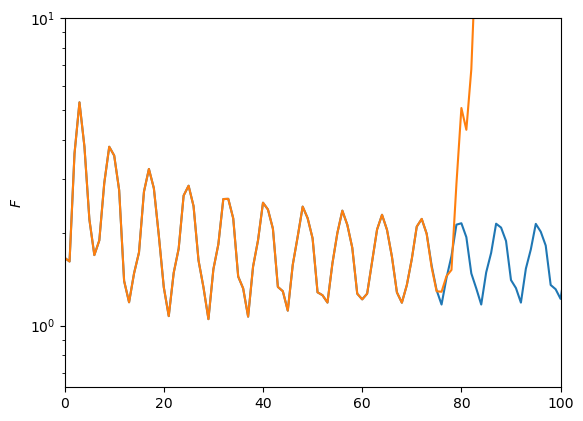

In [ ]:
floq_ftime_1000 = np.load('Results_Floquet/final_time_1000_test.npy')
floq_fisher_1000 = np.load('Results_Floquet/Fisher_mat_1000_test.npy')
floq_time_1000 = np.arange(0,floq_ftime_1000)
plt.plot(floq_time_1000 , floq_fisher_1000,"-")
plt.plot(floq_time_100 , floq_fisher_100,"-")

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.ylim(0,10)
plt.show()

plt.plot(floq_time_1000 , floq_fisher_1000,"-")
plt.plot(floq_time_100 , floq_fisher_100,"-")

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.ylim(0,10)
plt.xlim(0,100)
plt.show()



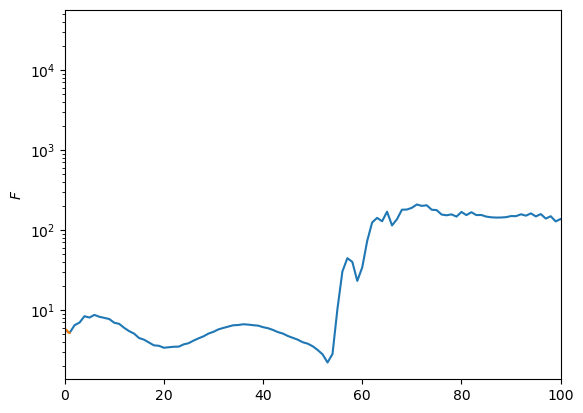

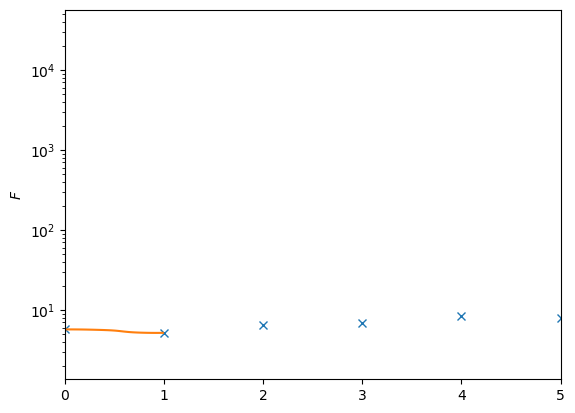

In [51]:
floq_ftime_100 = np.load('Results_Floquet/final_time_100_test_h_0.9.npy')
floq_fisher_100 = np.load('Results_Floquet/Fisher_mat_100_test_h_0.9.npy')
floq_time_100 = np.arange(0,floq_ftime_100)

floq1_time = np.load('Results/measure_tvec_100_test_h_0.9.npy')
floq1_fisher = np.load('Results/Fisher_mat_100_test_h_0.9.npy')

plt.plot(floq_time_100 , floq_fisher_100,"-")
plt.plot(floq1_time , floq1_fisher[0,0,:],"-")

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.xlim(0,100)
plt.show()

floq_ftime_100 = np.load('Results_Floquet/final_time_100_test_h_0.9.npy')
floq_fisher_100 = np.load('Results_Floquet/Fisher_mat_100_test_h_0.9.npy')
floq_time_100 = np.arange(0,floq_ftime_100)

floq1_time = np.load('Results/measure_tvec_100_test_h_0.9.npy')
floq1_fisher = np.load('Results/Fisher_mat_100_test_h_0.9.npy')

plt.plot(floq_time_100 , floq_fisher_100,"x")
plt.plot(floq1_time , floq1_fisher[0,0,:],"-")

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.xlim(0,5)
plt.show()



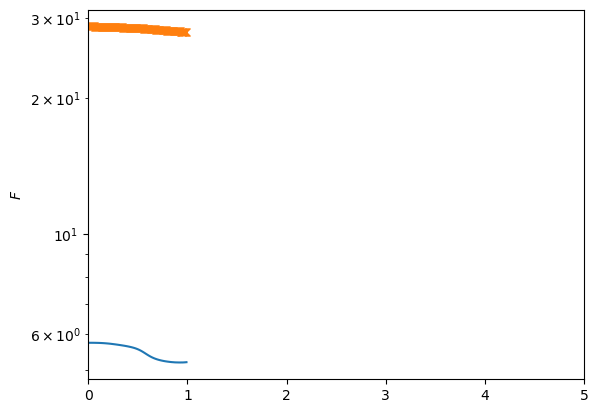

In [57]:
floq_time = np.load('Results/measure_tvec_100_test_h_0.9_subsystem_4.npy')
floq_fisher = np.load('Results/Fisher_mat_100_test_h_0.9_subsystem_4.npy')
plt.plot(floq_time , floq_fisher[0,0,:],"-")

floq_time_20 = np.load('Results/measure_tvec_100_test_h_0.9_subsystem_20.npy')
floq_fisher_20 = np.load('Results/Fisher_mat_100_test_h_0.9_subsystem_20.npy')
plt.plot(floq_time_20 , floq_fisher_20[0,0,:],"x")

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel(r"$F$")
plt.xlim(0,5)
plt.show()

